# Plot

## Plot semplice

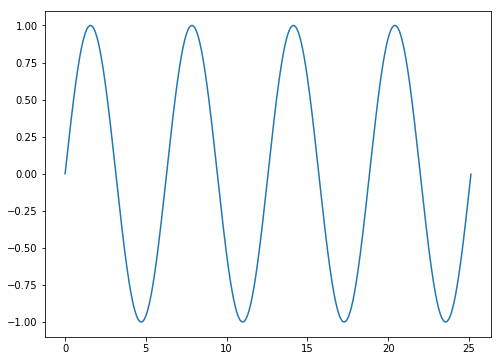

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione da plottare
x = np.arange(0.,8.*np.pi,0.01) # Asse x
y = np.sin(x)

# Plot
fig, ax = plt.subplots(figsize=(8,6)) # Inizializzazione
ax.plot(x,y)
plt.show()

### Fine tuning

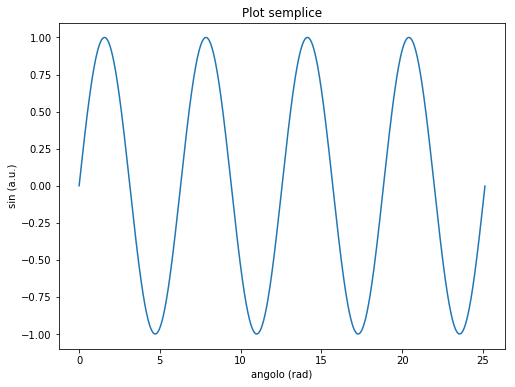

In [3]:
# Plot
fig, ax = plt.subplots(figsize=(8,6)) # Inizializzazione

ax.set_xlabel('angolo (rad)')
ax.set_ylabel('sin (a.u.)')
ax.set_title('Plot semplice')

ax.plot(x,y)
plt.show()

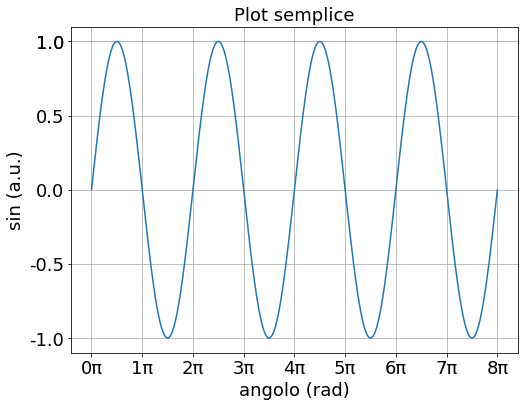

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(8,6)) # Inizializzazione

xticks  = [ i*np.pi for i in range(9) ] # Inline loop
xlabels = [str(i)+'π' for i in range(9)]

yticks  = [-1.,-0.5,0.,1.,0.5,1.]
ylabels = yticks

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=18)

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels,fontsize=18)

ax.set_xlabel('angolo (rad)',fontsize=18)
ax.set_ylabel('sin (a.u.)',fontsize=18)
ax.set_title('Plot semplice',fontsize=18)

ax.grid()

ax.plot(x,y)
plt.show()

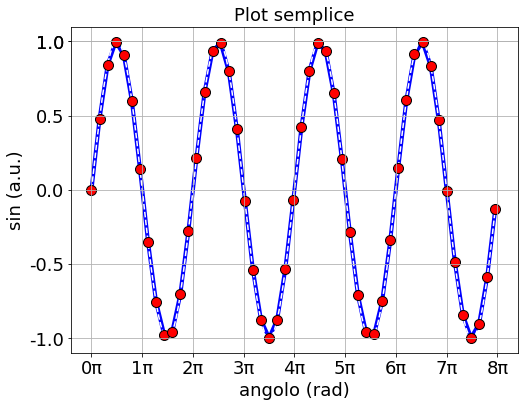

In [17]:
x2 = np.arange(0,8*np.pi,0.5)
y2 = np.sin(x2)

# Plot
fig, ax = plt.subplots(figsize=(8,6)) # Inizializzazione

xticks  = [ i*np.pi for i in range(9) ] # Inline loop
xlabels = [str(i)+'π' for i in range(9)]

yticks  = [-1.,-0.5,0.,1.,0.5,1.]
ylabels = yticks

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=18)

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels,fontsize=18)

ax.set_xlabel('angolo (rad)',fontsize=18)
ax.set_ylabel('sin (a.u.)',fontsize=18)
ax.set_title('Plot semplice',fontsize=18)

ax.grid()

#help(plt.plot)

ax.plot(x2,y2,'.',markersize=20,color='red',markeredgecolor='black',zorder=1)
ax.plot(x2,y2,'-',linewidth=4,color='blue',zorder=0)
ax.plot(x,y,'--',c='white',zorder=0.5)

plt.savefig('sine_example.pdf')
plt.show()

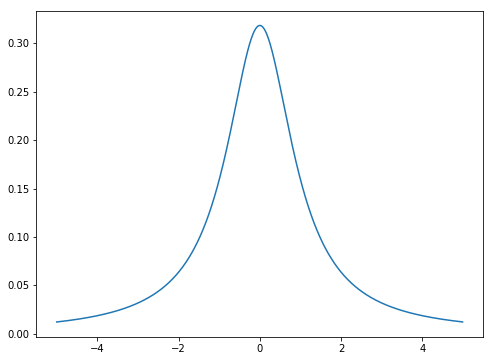

In [19]:
from scipy.stats import cauchy

x_lor = np.arange(-5.,5.,0.01)
y_lor = cauchy.pdf(x_lor,0,1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_lor,y_lor,'-')
plt.show()

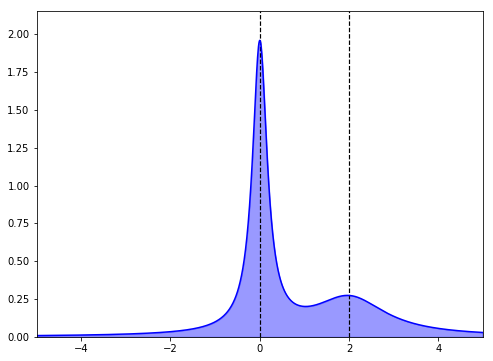

In [22]:
from scipy.stats import cauchy

x_lor = np.arange(-5.,5.,0.01)
y_lor = np.zeros(len(x_lor))

weights  = [1.2,0.8]
widths   = [0.2,1]
energies = [0,2]
for i in range(len(weights)):
    y_lor += weights[i]*cauchy.pdf(x_lor,energies[i],widths[i])

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlim(-5,5)
ax.set_ylim(0.,np.max(y_lor)*1.1)

ax.axvline(energies[0],ls='--',c='black',lw=1.2)
ax.axvline(energies[1],ls='--',c='black',lw=1.2)

ax.fill_between(x_lor,y_lor,color='blue',alpha=0.4)
ax.plot(x_lor,y_lor,'-',c='blue')
plt.show()

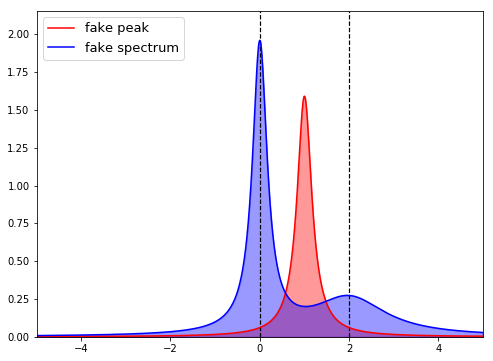

In [27]:
from scipy.stats import cauchy

x_lor = np.arange(-5.,5.,0.01)
y_lor = np.zeros(len(x_lor))

y_lor2 = cauchy.pdf(x_lor,1,0.2)

weights  = [1.2,0.8]
widths   = [0.2,1]
energies = [0,2]
for i in range(len(weights)):
    y_lor += weights[i]*cauchy.pdf(x_lor,energies[i],widths[i])

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlim(-5,5)
ax.set_ylim(0.,np.max(y_lor)*1.1)

ax.axvline(energies[0],ls='--',c='black',lw=1.2)
ax.axvline(energies[1],ls='--',c='black',lw=1.2)

ax.fill_between(x_lor,y_lor2,color='red',alpha=0.4)
ax.plot(x_lor,y_lor2,'-',c='red',label='fake peak')
ax.fill_between(x_lor,y_lor,color='blue',alpha=0.4)
ax.plot(x_lor,y_lor,'-',c='blue',label='fake spectrum')

plt.legend(fontsize=13,loc='upper left')
plt.show()

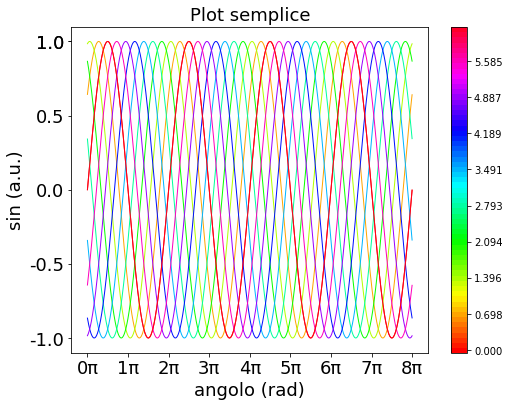

In [34]:
# Funzioni
x      = np.arange(0.,8*np.pi,0.01)
phases = np.linspace(0.,2*np.pi,10)

y = np.sin(x)

functions = []
for phase in phases: functions.append(np.sin(x+phase))

# Color map
colormap = plt.cm.hsv
colors   = [colormap(i) for i in np.linspace(0,1,10)]

# Plot
fig, ax = plt.subplots(figsize=(8,6)) # Inizializzazione

xticks  = [ i*np.pi for i in range(9) ] # Inline loop
xlabels = [str(i)+'π' for i in range(9)]

yticks  = [-1.,-0.5,0.,1.,0.5,1.]
ylabels = yticks

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=18)

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels,fontsize=18)

ax.set_xlabel('angolo (rad)',fontsize=18)
ax.set_ylabel('sin (a.u.)',fontsize=18)
ax.set_title('Plot semplice',fontsize=18)

#ax.grid()

for i,function in enumerate(functions): ax.plot(x,function,'-',lw=1,c=colors[i])

# Aggiunta di COLORBAR: super difficile per questo tipo di plot! 
# In questi casi cercare lo 'snippet' di codice giusto online!
from matplotlib import colors
norm = colors.Normalize(vmin=0,vmax=2.*np.pi)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0,2.*np.pi,len(functions)), 
             boundaries=np.arange(-0.05,2.*np.pi,0.1))
    
plt.show()

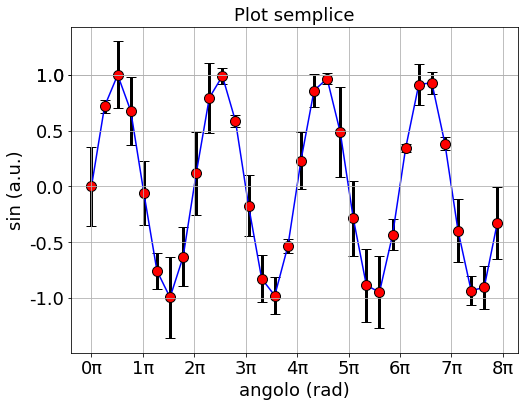

In [43]:
# Funzioni
x = np.arange(0.,8*np.pi,0.8)
y = np.sin(x)
y_err = np.random.rand(len(y))
y_err = y_err*0.4

# Plot
fig, ax = plt.subplots(figsize=(8,6)) # Inizializzazione

xticks  = [ i*np.pi for i in range(9) ] # Inline loop
xlabels = [str(i)+'π' for i in range(9)]

yticks  = [-1.,-0.5,0.,1.,0.5,1.]
ylabels = yticks

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels,fontsize=18)

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels,fontsize=18)

ax.set_xlabel('angolo (rad)',fontsize=18)
ax.set_ylabel('sin (a.u.)',fontsize=18)
ax.set_title('Plot semplice',fontsize=18)

ax.grid()

ax.errorbar(x,y,yerr=y_err,ecolor='black',elinewidth=3,color='blue',capsize=5,zorder=0)
ax.plot(x,y,'.',markersize=20,markeredgecolor='black',color='red',zorder=1)
plt.show()

## Scatterplot

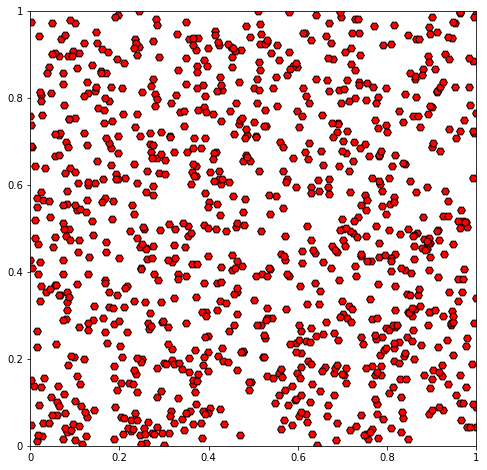

In [49]:
# Generiamo i dati
N = 1000
x = np.random.rand(N)
y = np.random.rand(N)

# Plot
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ticks = [0,0.2,0.4,0.6,0.8,1]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)

ax.scatter(x,y,s=60,marker='H',c='red',edgecolor='black')
plt.show()


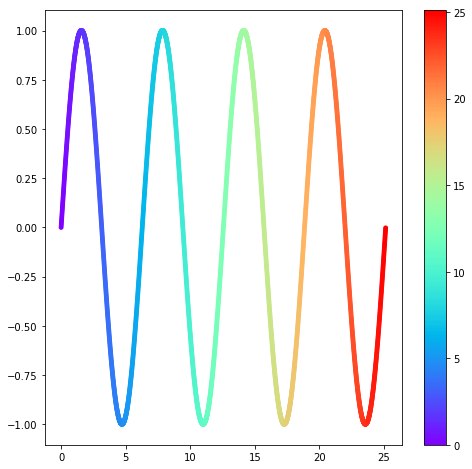

In [56]:
x = np.arange(0,8*np.pi,0.01)
y = np.sin(x)

# Plot
fig, ax = plt.subplots(figsize=(8,8))

#ax.set_xlim(0,1)
#ax.set_ylim(0,1)

#ticks = [0,0.2,0.4,0.6,0.8,1]
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_xticklabels(ticks)
#ax.set_yticklabels(ticks)
colormap = plt.cm.rainbow

my_plot = ax.scatter(x,y,s=60,marker='.',c=x,cmap=colormap)
fig.colorbar(my_plot,ax=ax)
plt.show()

### Plot di funzione a più variabili
$z = f(x,y)$

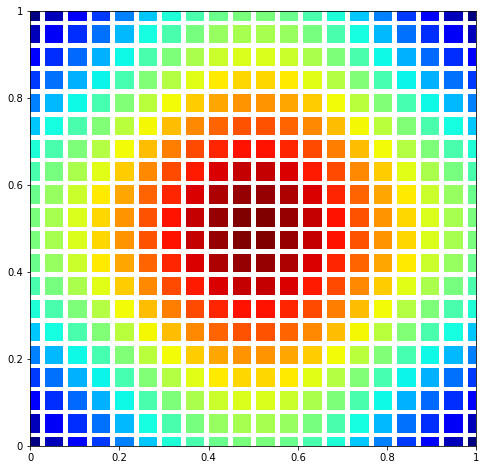

In [73]:
from scipy.stats import norm

N = 20
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
xx, yy = np.meshgrid(x,y)

mean  = 0.5
sigma = 0.3
z = norm.pdf(xx,loc=mean,scale=sigma)+norm.pdf(yy,loc=mean,scale=sigma)

# Color map
colormap = plt.cm.jet

# Plot
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ticks = [0,0.2,0.4,0.6,0.8,1]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)

ax.scatter(xx,yy,marker='s',s=300,c=z,cmap=colormap)
plt.show()


## Istogramma
$ G(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-(x-\mu)^2/2\sigma^2}$

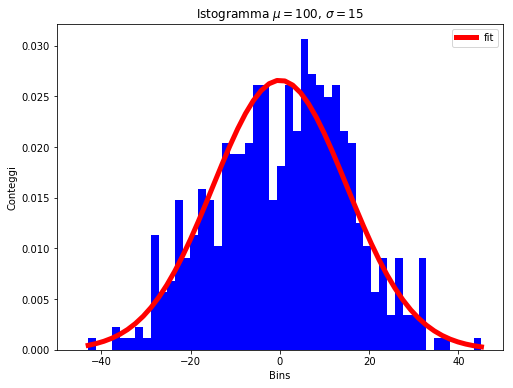

In [78]:
# Dati
N = 500
media = 0
sigma = 15
x = np.random.normal(mean,sigma,N)

num_bins = 50

# Plot
fig, ax = plt.subplots(figsize=(8,6)) 

ax.set_xlim(-50,50)
counts, bins, _ = ax.hist(x,num_bins,color='blue',density=True)

y = np.exp(-0.5 * ( (bins - media) / sigma )**2 ) / np.sqrt(2.*np.pi*sigma**2)

ax.plot(bins,y,'-',lw=5,color='red',label='fit',zorder=1)

ax.set_xlabel('Bins')
ax.set_ylabel('Conteggi')
ax.set_title(r'Istogramma $\mu=100$, $\sigma=15$')

plt.legend()
plt.show()